# Aim of this notebook
The goal of this note book is to automate the FAIR assesment of mutliple online resources through the [FAIR-Checker tool](https://fair-checker.france-bioinformatique.fr). 
All resulst are stored in a matrix and serialized into a CSV file. Scores can be interpreted as follows: 
 - 0 -> `failure`
 - 1 -> `weak` assesment
 - 2 -> `strong` assesment

To run this notebook you just need the `requests` and `pandas` python libraries. 

The FAIR-Checker API is better described at https://fair-checker.france-bioinformatique.fr/swagger 

Please report any issue at https://github.com/IFB-ElixirFr/fair-checker/issues or contact alban.gaignard@univ-nantes.fr. 

In [1]:
import time
import requests
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

## Input dataset

In [23]:
CDR_urls = [
    "https://www.ebi.ac.uk/biostudies/arrayexpress",
    "https://www.ebi.ac.uk/biostudies/bioimages/studies/S-BIAD705",
    "https://www.brenda-enzymes.org",
    "http://www.cathdb.info", 
    "https://www.cellosaurus.org", 
    "https://www.ebi.ac.uk/chebi", 
    "https://www.ebi.ac.uk/chembl/", 
    "https://ega-archive.org", 
    "https://www.ebi.ac.uk/ena/browser/home",
    "http://www.ensembl.org/index.html",
    "http://ensemblgenomes.org", 
    "https://europepmc.org", 
    "https://europepmc.org/article/MED/38030228", 
    "http://www.proteinatlas.org", 
    "https://www.ebi.ac.uk/intact/home", 
    "https://mint.bio.uniroma2.it", 
    "https://www.ebi.ac.uk/interpro/", 
    "https://www.orphadata.com/orphadata-science/", 
    "https://www.ebi.ac.uk/pdbe/", 
    "https://www.ebi.ac.uk/pride/archive/", 
    "https://reactome.org", 
    "https://www.rhea-db.org", 
    "https://www.arb-silva.de", 
    "https://string-db.org", 
    "https://www.uniprot.org"
]

In [24]:
FC_all_metrics_url = "https://fair-checker.france-bioinformatique.fr/api/check/metrics_all"

## FAIR assesment over all inputs 

In [25]:
df = pd.DataFrame()
rows = []

for u in CDR_urls:
#for u in urls:
    # call to the FC API
    start = time.time()
    res = requests.get(url=FC_all_metrics_url, params={"url": u})
    eval_in_sec = time.time() - start
    
    evaluations = res.json()
    row = {"URL": u}
    
    # iterating over all evaluation results
    for e in evaluations:
        row[e["metric"]] = int(e["score"])
    # row["duration (s)"] = round(eval_in_sec, 2)
    print(row)
    rows.append(row)

{'URL': 'https://www.ebi.ac.uk/biostudies/arrayexpress', 'F1A': 2, 'F1B': 0, 'F2A': 1, 'F2B': 2, 'A1.1': 2, 'A1.2': 0, 'I1': 1, 'I2': 2, 'I3': 0, 'R1.1': 0, 'R1.2': 0, 'R1.3': 2}
{'URL': 'https://www.ebi.ac.uk/biostudies/bioimages/studies/S-BIAD705', 'F1A': 2, 'F1B': 0, 'F2A': 1, 'F2B': 2, 'A1.1': 2, 'A1.2': 0, 'I1': 1, 'I2': 2, 'I3': 0, 'R1.1': 0, 'R1.2': 0, 'R1.3': 2}
{'URL': 'https://www.brenda-enzymes.org', 'F1A': 2, 'F1B': 0, 'F2A': 0, 'F2B': 0, 'A1.1': 2, 'A1.2': 0, 'I1': 0, 'I2': 0, 'I3': 0, 'R1.1': 0, 'R1.2': 0, 'R1.3': 0}
{'URL': 'http://www.cathdb.info', 'F1A': 2, 'F1B': 2, 'F2A': 1, 'F2B': 1, 'A1.1': 2, 'A1.2': 2, 'I1': 1, 'I2': 1, 'I3': 2, 'R1.1': 2, 'R1.2': 2, 'R1.3': 1}
{'URL': 'https://www.cellosaurus.org', 'F1A': 2, 'F1B': 2, 'F2A': 1, 'F2B': 1, 'A1.1': 2, 'A1.2': 2, 'I1': 1, 'I2': 1, 'I3': 2, 'R1.1': 2, 'R1.2': 2, 'R1.3': 1}
{'URL': 'https://www.ebi.ac.uk/chebi', 'F1A': 2, 'F1B': 0, 'F2A': 0, 'F2B': 0, 'A1.1': 2, 'A1.2': 0, 'I1': 0, 'I2': 0, 'I3': 0, 'R1.1': 0, 'R1.2':

## Evaluation matrix

In [51]:
from IPython.display import display, Markdown
df = pd.DataFrame.from_records(rows)
md = df.to_markdown()
display(Markdown(md))

|    | URL                                                          |   F1A |   F1B |   F2A |   F2B |   A1.1 |   A1.2 |   I1 |   I2 |   I3 |   R1.1 |   R1.2 |   R1.3 |
|---:|:-------------------------------------------------------------|------:|------:|------:|------:|-------:|-------:|-----:|-----:|-----:|-------:|-------:|-------:|
|  0 | https://www.ebi.ac.uk/biostudies/arrayexpress                |     2 |     0 |     1 |     2 |      2 |      0 |    1 |    2 |    0 |      0 |      0 |      2 |
|  1 | https://www.ebi.ac.uk/biostudies/bioimages/studies/S-BIAD705 |     2 |     0 |     1 |     2 |      2 |      0 |    1 |    2 |    0 |      0 |      0 |      2 |
|  2 | https://www.brenda-enzymes.org                               |     2 |     0 |     0 |     0 |      2 |      0 |    0 |    0 |    0 |      0 |      0 |      0 |
|  3 | http://www.cathdb.info                                       |     2 |     2 |     1 |     1 |      2 |      2 |    1 |    1 |    2 |      2 |      2 |      1 |
|  4 | https://www.cellosaurus.org                                  |     2 |     2 |     1 |     1 |      2 |      2 |    1 |    1 |    2 |      2 |      2 |      1 |
|  5 | https://www.ebi.ac.uk/chebi                                  |     2 |     0 |     0 |     0 |      2 |      0 |    0 |    0 |    0 |      0 |      0 |      0 |
|  6 | https://www.ebi.ac.uk/chembl/                                |     2 |     2 |     1 |     1 |      2 |      2 |    1 |    1 |    0 |      2 |      2 |      1 |
|  7 | https://ega-archive.org                                      |     2 |     0 |     1 |     2 |      2 |      0 |    1 |    2 |    0 |      0 |      0 |      2 |
|  8 | https://www.ebi.ac.uk/ena/browser/home                       |     2 |     0 |     0 |     0 |      2 |      0 |    0 |    0 |    0 |      0 |      0 |      0 |
|  9 | http://www.ensembl.org/index.html                            |     2 |     0 |     1 |     1 |      2 |      2 |    1 |    1 |    2 |      2 |      2 |      1 |
| 10 | http://ensemblgenomes.org                                    |     2 |     0 |     0 |     0 |      2 |      0 |    0 |    0 |    0 |      0 |      0 |      0 |
| 11 | https://europepmc.org                                        |     2 |     0 |     0 |     0 |      2 |      0 |    0 |    0 |    0 |      0 |      0 |      0 |
| 12 | https://europepmc.org/article/MED/38030228                   |     2 |     0 |     0 |     0 |      2 |      0 |    0 |    0 |    0 |      0 |      0 |      0 |
| 13 | http://www.proteinatlas.org                                  |     2 |     2 |     1 |     1 |      2 |      2 |    1 |    1 |    0 |      2 |      2 |      1 |
| 14 | https://www.ebi.ac.uk/intact/home                            |     2 |     0 |     0 |     0 |      2 |      0 |    0 |    0 |    0 |      0 |      0 |      0 |
| 15 | https://mint.bio.uniroma2.it                                 |     2 |     2 |     1 |     1 |      2 |      0 |    1 |    1 |    2 |      0 |      2 |      1 |
| 16 | https://www.ebi.ac.uk/interpro/                              |     2 |     2 |     1 |     1 |      2 |      2 |    1 |    1 |    2 |      2 |      2 |      1 |
| 17 | https://www.orphadata.com/orphadata-science/                 |     2 |     0 |     1 |     0 |      2 |      0 |    1 |    0 |    0 |      0 |      0 |      0 |
| 18 | https://www.ebi.ac.uk/pdbe/                                  |     2 |     0 |     1 |     2 |      2 |      0 |    1 |    2 |    0 |      0 |      0 |      2 |
| 19 | https://www.ebi.ac.uk/pride/archive/                         |     2 |     0 |     0 |     0 |      2 |      0 |    0 |    0 |    0 |      0 |      0 |      0 |
| 20 | https://reactome.org                                         |     2 |     0 |     1 |     1 |      2 |      0 |    1 |    1 |    0 |      0 |      0 |      1 |
| 21 | https://www.rhea-db.org                                      |     2 |     0 |     1 |     1 |      2 |      2 |    1 |    1 |    2 |      2 |      2 |      1 |
| 22 | https://www.arb-silva.de                                     |     2 |     0 |     1 |     2 |      2 |      0 |    1 |    2 |    0 |      0 |      0 |      2 |
| 23 | https://string-db.org                                        |     2 |     2 |     1 |     1 |      2 |      2 |    1 |    1 |    2 |      2 |      2 |      1 |
| 24 | https://www.uniprot.org                                      |     2 |     0 |     1 |     1 |      2 |      0 |    1 |    1 |    0 |      0 |      2 |      1 |

In [55]:
df.to_csv("fc_evals.csv")

In [53]:
import matplotlib.pyplot as plt
plot = df.boxplot(grid=False, rot=45, fontsize=8)
plot.set_title("FAIR assesment on 20+ Elixir core data resources")
plt.savefig('boxplot.png', dpi=300)
plot

<Axes: title={'center': 'FAIR assesment on 20+ Elixir core data resources'}, xlabel='R1.3', ylabel='Count'>

In [54]:
# import seaborn as sns 
# sns.histplot(data=df["R1.3"])
# plt.savefig('r13.png', dpi=300)
df

,URL,F1A,F1B,F2A,F2B,A1.1,A1.2,I1,I2,I3,R1.1,R1.2,R1.3
0,https://www.ebi.ac.uk/biostudies/arrayexpress,2,0,1,2,2,0,1,2,0,0,0,2
1,https://www.ebi.ac.uk/biostudies/bioimages/stu...,2,0,1,2,2,0,1,2,0,0,0,2
2,https://www.brenda-enzymes.org,2,0,0,0,2,0,0,0,0,0,0,0
3,http://www.cathdb.info,2,2,1,1,2,2,1,1,2,2,2,1
4,https://www.cellosaurus.org,2,2,1,1,2,2,1,1,2,2,2,1
5,https://www.ebi.ac.uk/chebi,2,0,0,0,2,0,0,0,0,0,0,0
6,https://www.ebi.ac.uk/chembl/,2,2,1,1,2,2,1,1,0,2,2,1
7,https://ega-archive.org,2,0,1,2,2,0,1,2,0,0,0,2
8,https://www.ebi.ac.uk/ena/browser/home,2,0,0,0,2,0,0,0,0,0,0,0
9,http://www.ensembl.org/index.html,2,0,1,1,2,2,1,1,2,2,2,1


## Visualisation

In [12]:
import seaborn as sns 
sns.set_theme(style="whitegrid", palette="muted")

df = pd.read_csv("fc_evals.csv")
df

,Unnamed: 0,URL,F1A,F1B,F2A,F2B,A1.1,A1.2,I1,I2,I3,R1.1,R1.2,R1.3
0,0,https://www.ebi.ac.uk/biostudies/arrayexpress,2,0,1,2,2,0,1,2,0,0,0,2
1,1,https://www.ebi.ac.uk/biostudies/bioimages/stu...,2,0,1,2,2,0,1,2,0,0,0,2
2,2,https://www.brenda-enzymes.org,2,0,0,0,2,0,0,0,0,0,0,0
3,3,http://www.cathdb.info,2,2,1,1,2,2,1,1,2,2,2,1
4,4,https://www.cellosaurus.org,2,2,1,1,2,2,1,1,2,2,2,1
5,5,https://www.ebi.ac.uk/chebi,2,0,0,0,2,0,0,0,0,0,0,0
6,6,https://www.ebi.ac.uk/chembl/,2,2,1,1,2,2,1,1,0,2,2,1
7,7,https://ega-archive.org,2,0,1,2,2,0,1,2,0,0,0,2
8,8,https://www.ebi.ac.uk/ena/browser/home,2,0,0,0,2,0,0,0,0,0,0,0
9,9,http://www.ensembl.org/index.html,2,0,1,1,2,2,1,1,2,2,2,1


<Axes: xlabel='R1.3'>

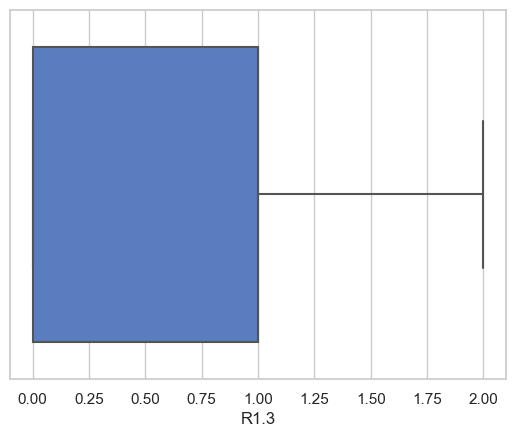

In [13]:
#sns.histplot(data=df["R1.3"])
sns.boxplot(x=df["R1.3"])

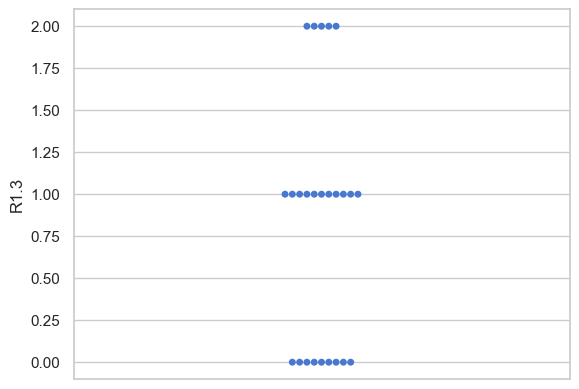

In [20]:
sns.set_theme(style="whitegrid", palette="muted")

ax = sns.swarmplot(data=df, y="R1.3")

In [10]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
